### Лабораторная №1
![Picture for task](https://sun9-28.userapi.com/c855228/v855228840/223cd9/Iyxz1WNXnf0.jpg)
***Вариант 4***
$$ Y=\sqrt{x}, a=1, b=5 $$

1. Параметры равномерного распределения:  
$$ m_{x} = \frac {a+b}{2}=3, ~ \sigma_{x} = \sqrt{\frac{(b-a)^2}{12}}=\frac {2\sqrt{3}}{3} $$
Выборка генерируется встроенной функцией `random()`, которая возвращает число из интервала `[0,1)`

In [508]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np
from math import sqrt

In [509]:
f = lambda x: sqrt(x)
a = 1
b = 5

In [510]:
n = int(input())

105


In [511]:
x = [a + (b - a) * random.uniform(0, 1) for _ in range(n)]
y = [round(f(val), 3) for val in x]

2. Вариационный ряд и эмпирическая функция

In [512]:
var_series = sorted(y)
count = [y.count(val) for val in y]

table = pd.DataFrame(
    {
        'y_i': var_series,
        'n_i': count
    }
)
print("Вариационный ряд")
table

Вариационный ряд


,y_i,n_i
0,1.014,1
1,1.042,1
2,1.052,1
3,1.060,1
4,1.077,1
...,...,...
100,2.194,1
101,2.197,1
102,2.203,1
103,2.233,1


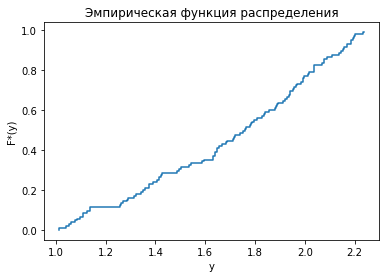

In [513]:
# эмпирическая функция распределения: count(X < x0) / count(X)
F = lambda X, x0: float(len([num for num in X if num < x0])) / float(len(X))

plt.step(var_series, [F(y, y0) for y0 in var_series])
plt.xlabel('y')
plt.ylabel('F*(y)')
plt.title("Эмпирическая функция распределения")
plt.show()

3. Теоретическая функция распределения $ G(Y) $


$$ f(x) = \begin{cases}
\frac {1}{4}, x \in [1,5], \\
0, x \notin [1,5] \\
\end{cases}
$$
$$ y = \phi(x)= \sqrt {x}$$
$$x=\psi(y)= y^2$$
$$ |\psi'(y)| = 2y $$
$$ g(y) = \phi(y)=f(\psi(y))|\psi'(y)| $$
$$ g(y)= \frac {y}{2}, y \in [1, \sqrt{5}] $$
$$ G(y) = \begin{cases}
0, y < 0, \\
\frac {y^2}{4} - \frac{1}{4}, y \in [1,\sqrt{5}],\\
1, y > \sqrt{5} \\
\end{cases}
$$



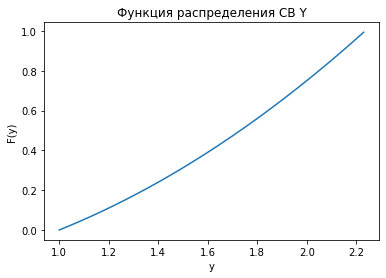

In [514]:
Y = lambda y: y ** 2 / 4 - 0.25
u = np.arange(1, sqrt(5), 0.01)
plt.plot(u, [Y(val) for val in u]) 
plt.xlabel('y')
plt.ylabel('F(y)')
plt.title("Функция распределения СВ Y")
plt.show()

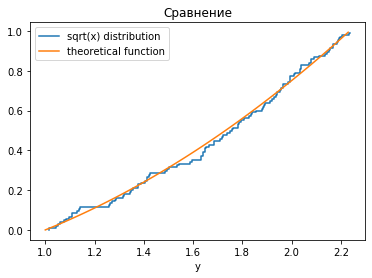

In [515]:
plt.step(var_series, [F(y, y0) for y0 in var_series], label="sqrt(x) distribution")
plt.plot(u, [Y(val) for val in u], label="theoretical function")
plt.legend(loc="best")
plt.xlabel('y')
plt.title('Сравнение')
plt.show()

### Лабораторная №2
![Picture for task](https://sun9-63.userapi.com/c855228/v855228840/223cec/DRLn0wFGFEE.jpg)

**Задание 2**  
*Равноинтервальный метод*

In [516]:
if n <= 100:
    M = int(sqrt(n))
else:
    M = int(4 * np.log10(n))

In [517]:
h = round((var_series[-1] - var_series[0]) / M, 4)
print(f'M={M}, h={h}')

M=8, h=0.1528


In [518]:
A_i = [round(var_series[0] + (i - 1) * h, 3) for i in range(1, M+2)]
a = A_i[:-1]
b = A_i[1:] 
intervals = list(zip(a, b))
print(a)
print(b)
print(f"invervals: {intervals}")

[1.014, 1.167, 1.32, 1.472, 1.625, 1.778, 1.931, 2.084]
[1.167, 1.32, 1.472, 1.625, 1.778, 1.931, 2.084, 2.236]
invervals: [(1.014, 1.167), (1.167, 1.32), (1.32, 1.472), (1.472, 1.625), (1.625, 1.778), (1.778, 1.931), (1.931, 2.084), (2.084, 2.236)]


In [519]:
m_i = np.zeros(M)
num_interval = 0
i = 0
for val in var_series:
    if val >= intervals[num_interval][0] and val <= intervals[num_interval][1]:
        m_i[num_interval] += 1
        continue
    num_interval += 1
    m_i[num_interval] +=1
        
print(f'кол-во точек в интервалах: {m_i}')

кол-во точек в интервалах: [12.  7. 11.  7. 17. 16. 20. 15.]


In [520]:
#средняя плотность вероятности для каждого интервала
f = [round(m_i[i] / (n * h), 4) for i in range(M)]
print(f)

[0.7479, 0.4363, 0.6856, 0.4363, 1.0596, 0.9973, 1.2466, 0.9349]


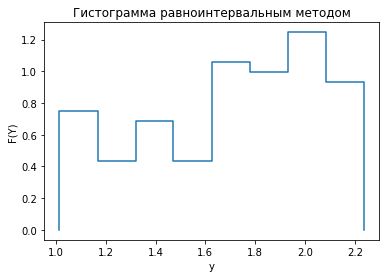

In [521]:
x = [intervals[0][0]]
y = [0]
for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(f[i])
    y.append(f[i])
x.append(intervals[M-1][1])
y.append(0)
 
plt.plot(x, y)
plt.title("Гистограмма равноинтервальным методом")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

[1.0905, 1.2435, 1.396, 1.5485, 1.7015, 1.8545, 2.0075, 2.16]


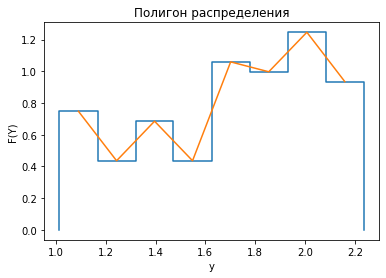

In [522]:
middle = [round(intervals[i][0] + (intervals[i][1] - intervals[i][0]) / 2, 5)  for i in range(M)]
print(middle)

plt.plot(x, y)
plt.plot(middle, f)
plt.title("Полигон распределения")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

In [523]:
empiric_func = []
sum = 0
for i in m_i:
    empiric_func.append(round(sum / n, 5))
    sum += i
empiric_func.append(1)
print(f'empirical function: {empiric_func}')

empirical function: [0.0, 0.11429, 0.18095, 0.28571, 0.35238, 0.51429, 0.66667, 0.85714, 1]


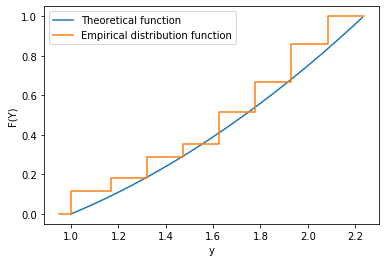

In [524]:
x = [0.95, 1, 1]
y = [0, 0, empiric_func[1]]
del empiric_func[0]

for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(empiric_func[i])
    y.append(empiric_func[i])
x.append(intervals[M-1][1])
y.append(1)

Y = lambda y: y ** 2 / 4 - 0.25
u = np.arange(1, sqrt(5), 0.01)
plt.plot(u, [Y(val) for val in u], label="Theoretical function") 
plt.plot(x, y, label='Empirical distribution function')
plt.legend(loc="best")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

In [525]:
t = pd.DataFrame(
    {
        'interval': intervals,
        'm_i': m_i,
        'h_i': h,
        'f_i': f
    }
)
t

,interval,m_i,h_i,f_i
0,"(1.014, 1.167)",12.0,0.1528,0.7479
1,"(1.167, 1.32)",7.0,0.1528,0.4363
2,"(1.32, 1.472)",11.0,0.1528,0.6856
3,"(1.472, 1.625)",7.0,0.1528,0.4363
4,"(1.625, 1.778)",17.0,0.1528,1.0596
5,"(1.778, 1.931)",16.0,0.1528,0.9973
6,"(1.931, 2.084)",20.0,0.1528,1.2466
7,"(2.084, 2.236)",15.0,0.1528,0.9349


In [526]:
Y = lambda y: y / 2 
u = np.arange(1, sqrt(5), 0.01)

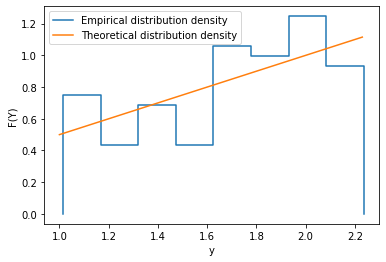

In [527]:
x = [intervals[0][0]]
y = [0]
for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(f[i])
    y.append(f[i])
x.append(intervals[M-1][1])
y.append(0)
 
plt.plot(x, y, label='Empirical distribution density')
plt.plot(u, [Y(val) for val in u], label='Theoretical distribution density')
plt.legend(loc="best")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

![Picture for task](https://sun9-60.userapi.com/c857024/v857024004/146015/GVe2lpcHi24.jpg)

In [528]:
m = n // M

In [529]:
A = np.zeros(M)
B = np.zeros(M)
A[0] = var_series[0]
B[-1] = var_series[-1]
for i in range(1, M):
    A[i] = round((var_series[i*m] + var_series[i*m + 1]) / 2, 5)
    B[i - 1] = A[i]

intervals = list(zip(A, B))
print(f"invervals: {intervals}")

h_i = [round(interval[1] - interval[0], 5) for interval in intervals]
print(f"lengt of intervals: {h_i}")

invervals: [(1.014, 1.266), (1.266, 1.414), (1.414, 1.64), (1.64, 1.7615), (1.7615, 1.8915), (1.8915, 1.9935), (1.9935, 2.1225), (2.1225, 2.236)]
lengt of intervals: [0.252, 0.148, 0.226, 0.1215, 0.13, 0.102, 0.129, 0.1135]


In [530]:
#средняя плотность вероятности для каждого интервала
f = [round(m / (n * h_i[i]), 4) for i in range(M)]
print(f)

[0.4913, 0.8366, 0.5478, 1.019, 0.9524, 1.2138, 0.9598, 1.0908]


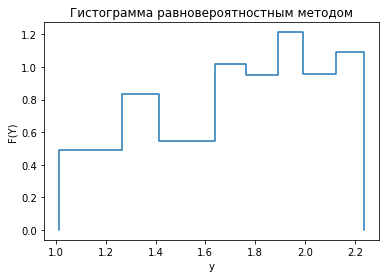

In [531]:
x = [intervals[0][0]]
y = [0]
for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(f[i])
    y.append(f[i])
x.append(intervals[M-1][1])
y.append(0)
 
plt.plot(x, y)
plt.title("Гистограмма равновероятностным методом")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

[1.14, 1.34, 1.527, 1.70075, 1.8265, 1.9425, 2.058, 2.17925]


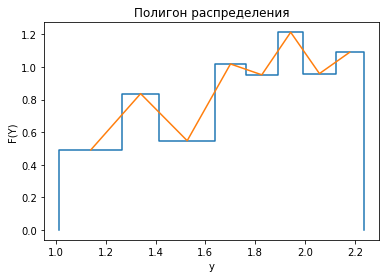

In [532]:
middle = [round(intervals[i][0] + (intervals[i][1] - intervals[i][0]) / 2, 5)  for i in range(M)]
print(middle)

plt.plot(x, y)
plt.plot(middle, f)
plt.title("Полигон распределения")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

In [533]:
empiric_func = []
sum = 0
for i in m_i:
    empiric_func.append(round(sum / n, 5))
    sum += i
empiric_func.append(1)
print(f'empirical function: {empiric_func}')

empirical function: [0.0, 0.11429, 0.18095, 0.28571, 0.35238, 0.51429, 0.66667, 0.85714, 1]


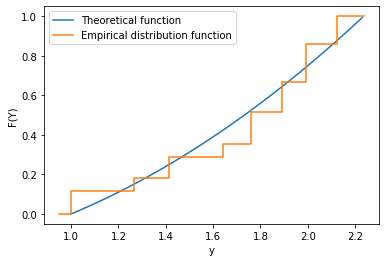

In [534]:
x = [0.95, 1, 1]
y = [0, 0, empiric_func[1]]
del empiric_func[0]

for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(empiric_func[i])
    y.append(empiric_func[i])
x.append(intervals[M-1][1])
y.append(1)

Y = lambda y: y ** 2 / 4 - 0.25
u = np.arange(1, sqrt(5), 0.01)
plt.plot(u, [Y(val) for val in u], label="Theoretical function") 
plt.plot(x, y, label='Empirical distribution function')
plt.legend(loc="best")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

In [535]:
t = pd.DataFrame(
    {
        'interval': intervals,
        'm_i': m,
        'h_i': h_i,
        'f_i': f
    }
)
t

,interval,m_i,h_i,f_i
0,"(1.014, 1.266)",13,0.2520,0.4913
1,"(1.266, 1.414)",13,0.1480,0.8366
2,"(1.414, 1.64)",13,0.2260,0.5478
3,"(1.64, 1.7615)",13,0.1215,1.0190
4,"(1.7615, 1.8915)",13,0.1300,0.9524
5,"(1.8915, 1.9935)",13,0.1020,1.2138
6,"(1.9935, 2.1225)",13,0.1290,0.9598
7,"(2.1225, 2.236)",13,0.1135,1.0908


In [536]:
Y = lambda y: y / 2 
u = np.arange(1, sqrt(5), 0.01)

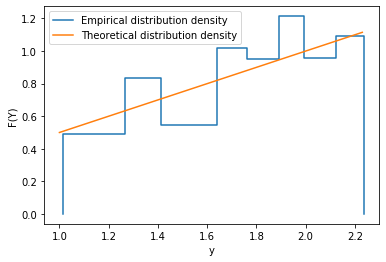

In [537]:
x = [intervals[0][0]]
y = [0]
for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(f[i])
    y.append(f[i])
x.append(intervals[M-1][1])
y.append(0)
 
plt.plot(x, y, label='Empirical distribution density')
plt.plot(u, [Y(val) for val in u], label='Theoretical distribution density')
plt.legend(loc="best")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()